In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

* 데이터 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [119]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [120]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [121]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 기술 통계로 알 수 있는 점

* BMI 최솟값이 0
* 인슐린 표준편차가 굉장히 크다
* 인슐린 최댓값이 846 (정상 체중을 가진 사람에서 공복 인슐린 농도는 약 5~15)

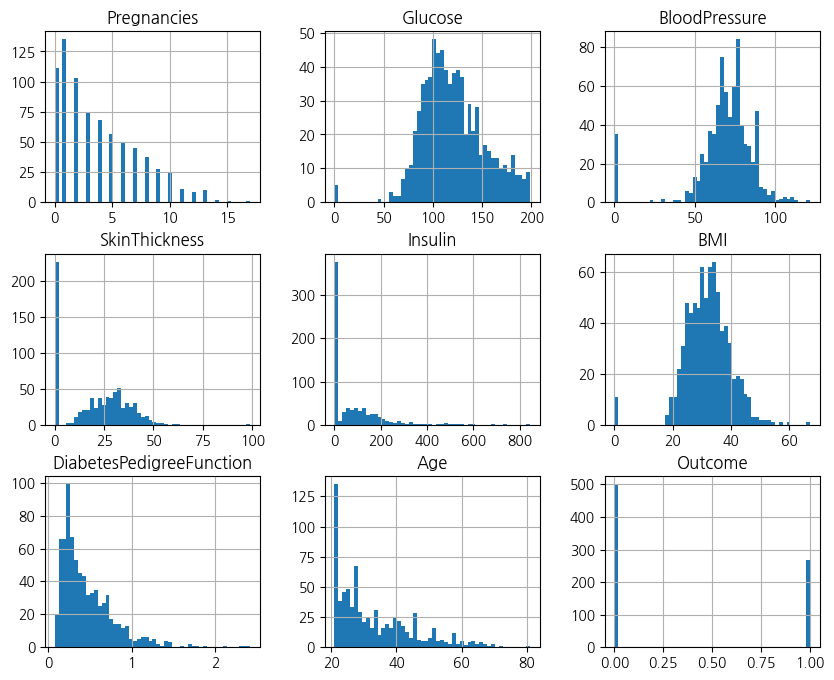

In [122]:
df.hist(figsize=(10, 8), bins=50);

## 특이점
* 당수치, 혈압, 인슐린, bmi가 0인 사람

Text(0.5, 1.0, '임신 횟수별 당뇨병 발병 빈도')

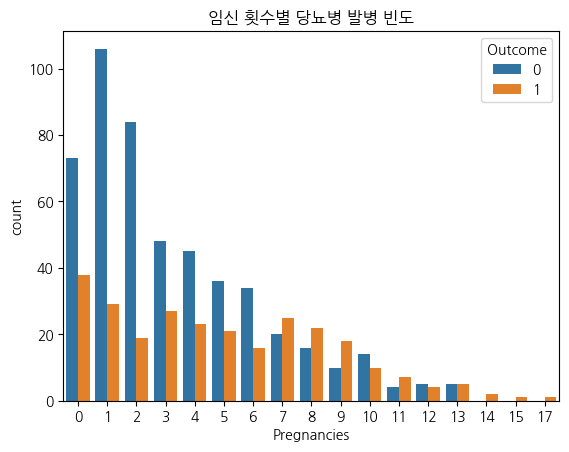

In [123]:
sns.countplot(data=df, x="Pregnancies", hue='Outcome')
plt.title("임신 횟수별 당뇨병 발병 빈도")

Text(0.5, 1.0, '연령대 별 혈압')

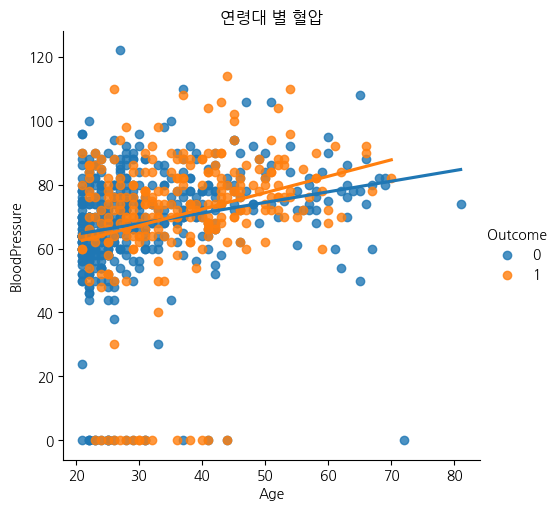

In [124]:
sns.lmplot(data=df, x="Age", y="BloodPressure",hue="Outcome", ci=False)
plt.title("연령대 별 혈압")

# Feature Engineering
* 머신러닝 알고리즘에게 힌트 제공
* 결정 트리의 오버피팅 방지
    * 조건들이 잘게 나누어지는 것을 방지

## 수치형 변수를 범주형 변수로

<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

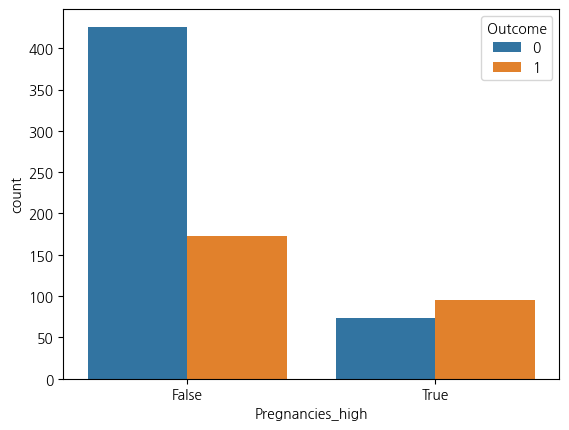

In [125]:
# 임신횟수가 6보다 큰 값 파생변수 생성
df["Pregnancies_high"] = df["Pregnancies"] > 6
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

## 결측치

In [126]:
# Insulin이 0인 값을 결측치 NaN으로 채운 새로운 파생변수
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)

In [127]:
# 결측치 수
df["Insulin_nan"].isnull().sum()

374

In [128]:
# 결측치 비율
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [129]:
# 0을 결측치로 채우기 전 기술통계
df.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


In [130]:
# 0을 결측치로 채운 후 기술통계
df.groupby("Outcome")["Insulin_nan"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [131]:
# 당뇨병 결과 별 인슐린의 평균
Insulin_mean = df.groupby("Outcome")["Insulin_nan"].mean()
Insulin_mean

Outcome
0    130.287879
1    206.846154
Name: Insulin_nan, dtype: float64

In [132]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,180.0
764,2,122,70,27,0,36.8,0.340,27,0,False,NaN
765,5,121,72,23,112,26.2,0.245,30,0,False,112.0
766,1,126,60,0,0,30.1,0.349,47,1,False,NaN


In [133]:
# 결측치를 평균으로 채우기
df["Insulin_fill"] = df["Insulin_nan"]
df.loc[(df["Outcome"] == 0)&(df["Insulin_nan"].isnull()), "Insulin_fill"] = Insulin_mean[0]
df.loc[(df["Outcome"] == 1)&(df["Insulin_nan"].isnull()), "Insulin_fill"] = Insulin_mean[1]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_fill
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN,206.846154
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN,130.287879
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN,206.846154
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,94.000000
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,168.000000


## 이상치

# train : test = 8 : 2 분리

## 학습에 사용할 컬럼

In [156]:
feature_names = df.columns.tolist()
# label 제거
feature_names.remove("Outcome")
# Insulin_fill 이외 다른 Insulin 컬럼 제거
feature_names.remove("Insulin")
feature_names.remove("Insulin_nan")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_fill']

In [157]:
label_name = "Outcome" 

In [158]:
split_count = int(df.shape[0] * 0.8)
split_count

614

## train set

In [159]:
train = df[:split_count]

train.shape

(614, 12)

In [160]:
X_train = train[feature_names]
X_train.shape

(614, 9)

In [161]:
y_train = train[label_name]
y_train.shape

(614,)

## test set

In [162]:
test = df[split_count:]
test.shape

(154, 12)

In [163]:
X_test = test[feature_names]
X_test.shape

(154, 9)

In [164]:
y_test = test[label_name]
y_test.shape

(154,)

# Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
model = DecisionTreeClassifier(random_state=42, max_depth=4, max_features=7, min_samples_leaf=4)

In [233]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=7, min_samples_leaf=4,
                       random_state=42)

In [234]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# 시각화

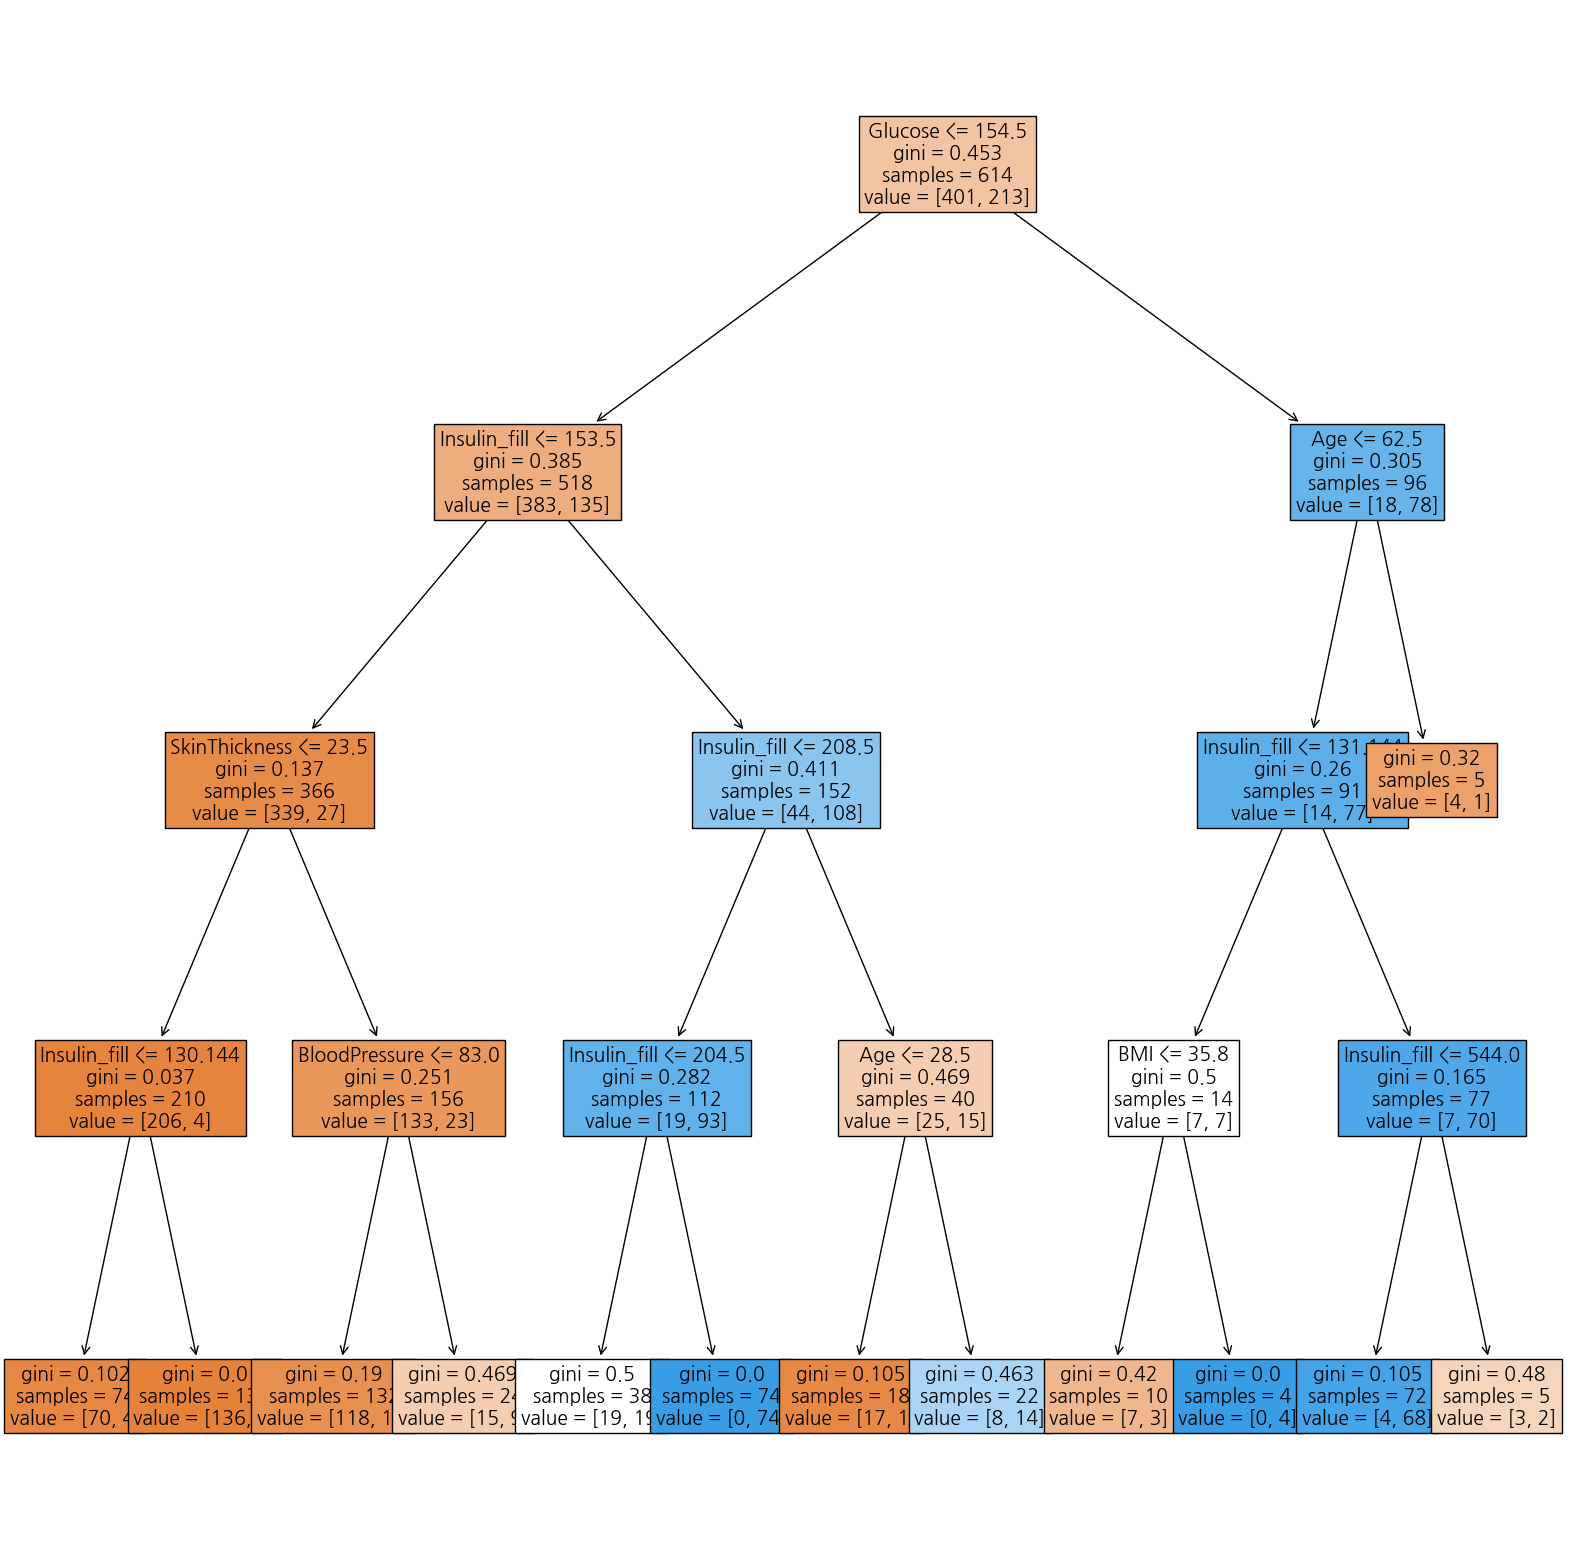

In [235]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model, max_depth=4, feature_names=feature_names, filled=True, fontsize=14)
plt.show()

# 모델 평가

## feature importance

In [236]:
model.feature_importances_

array([0.        , 0.26305831, 0.01566376, 0.01573404, 0.01492982,
       0.        , 0.05671725, 0.        , 0.63389683])

<AxesSubplot:>

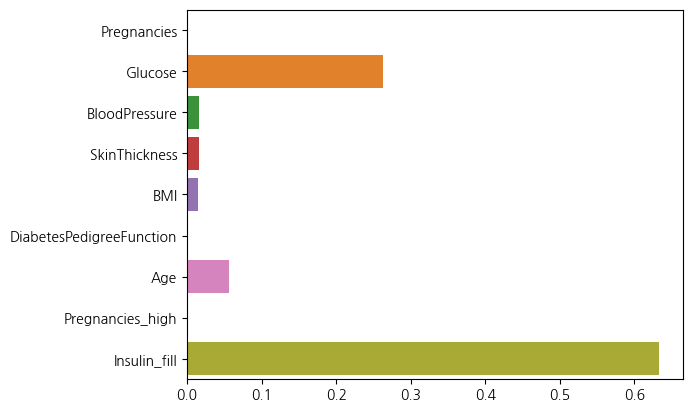

In [237]:
sns.barplot(x=model.feature_importances_,  y=model.feature_names_in_)

## 정확도

In [238]:
model.score(X_test, y_test)

0.8766233766233766

## 하이퍼 파라미터 그리드 서치

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
model = DecisionTreeClassifier()

In [228]:
hyper_parameter = {
    "max_depth": [i for i in range(1, 10)], 
    "max_features": [i for i in range(1, 10)],
    "min_samples_leaf": [i for i in range(1, 10)]
}

In [229]:
hyper_parameter_tuner = GridSearchCV(model, hyper_parameter, cv=5)

In [230]:
hyper_parameter_tuner.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [231]:
hyper_parameter_tuner.best_params_

{'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 4}